## Import Libraries & Load Dataset ##

In [3]:
import pandas as pd 
import numpy as ny
import matplotlib.pyplot as plt

df= pd.read_csv("E-Commerce Order Fulfillment Dataset (50K Records).csv")

print("✅Data Loaded Successfully!")
df.head()


✅Data Loaded Successfully!


,Order_ID,Customer_Region,Product_Category,Order_Date,Ship_Date,Delivery_Date,Shipping_Mode,Shipping_Cost,Delivery_Status,Delivery_Days
0,OR10000,West,Home,5/12/2024,5/16/2024,5/26/2024,Standard,122,Delivered,10
1,OR10001,Central,Home,4/19/2025,4/24/2025,4/26/2025,Standard,143,Delivered,2
2,OR10002,East,Home,7/2/2025,7/4/2025,7/11/2025,Standard,107,Delayed,7
3,OR10003,Central,Grocery,10/4/2025,10/8/2025,10/16/2025,Standard,145,Delayed,8
4,OR10004,Central,Sports,10/31/2023,11/2/2023,11/7/2023,Standard,121,Delivered,5


## Basic Dataset info ##

In [15]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          50000 non-null  object
 1   Customer_Region   50000 non-null  object
 2   Product_Category  50000 non-null  object
 3   Order_Date        50000 non-null  object
 4   Ship_Date         50000 non-null  object
 5   Delivery_Date     50000 non-null  object
 6   Shipping_Mode     50000 non-null  object
 7   Shipping_Cost     50000 non-null  int64 
 8   Delivery_Status   50000 non-null  object
 9   Delivery_Days     50000 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.8+ MB


Order_ID            50000
Customer_Region         5
Product_Category        6
Order_Date           1461
Ship_Date            1466
Delivery_Date        1473
Shipping_Mode           3
Shipping_Cost         350
Delivery_Status         3
Delivery_Days           9
dtype: int64

## Check date ranges & data consistency  ##

In [16]:
df["Order_Date"]=pd.to_datetime(df["Order_Date"])
df["Ship_Date"]= pd.to_datetime(df["Ship_Date"])
df["Delivery_Date"]= pd.to_datetime(df["Delivery_Date"])

df[["Order_Date","Ship_Date","Delivery_Date"]].describe()


,Order_Date,Ship_Date,Delivery_Date
count,50000,50000,50000
mean,2023-12-31 09:57:20.447999744,2024-01-02 21:43:58.655999744,2024-01-08 21:29:13.919999744
min,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-03 00:00:00
25%,2023-01-03 00:00:00,2023-01-05 00:00:00,2023-01-12 00:00:00
50%,2023-12-29 12:00:00,2024-01-01 00:00:00,2024-01-07 00:00:00
75%,2024-12-31 00:00:00,2025-01-03 00:00:00,2025-01-08 00:00:00
max,2025-12-31 00:00:00,2026-01-05 00:00:00,2026-01-14 00:00:00


In [18]:
# Checking if the Dtype is chaged successfully or not 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          50000 non-null  object        
 1   Customer_Region   50000 non-null  object        
 2   Product_Category  50000 non-null  object        
 3   Order_Date        50000 non-null  datetime64[ns]
 4   Ship_Date         50000 non-null  datetime64[ns]
 5   Delivery_Date     50000 non-null  datetime64[ns]
 6   Shipping_Mode     50000 non-null  object        
 7   Shipping_Cost     50000 non-null  int64         
 8   Delivery_Status   50000 non-null  object        
 9   Delivery_Days     50000 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(5)
memory usage: 3.8+ MB


## Charts ##

### 1️⃣ Distribution of Delivery Days ###

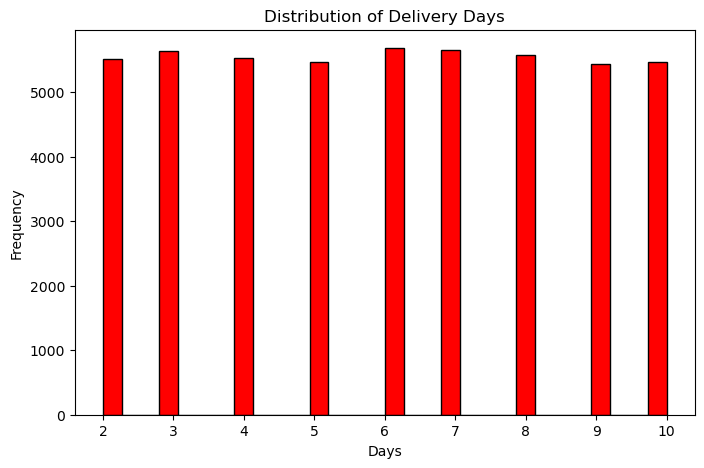

In [21]:
df["Delivery_Days"].plot(kind="hist",bins=30,figsize=(8,5),color="red",edgecolor="black")
plt.title("Distribution of Delivery Days")
plt.xlabel("Days")
plt.show()

### 2️⃣ Count of Delivery Status ###

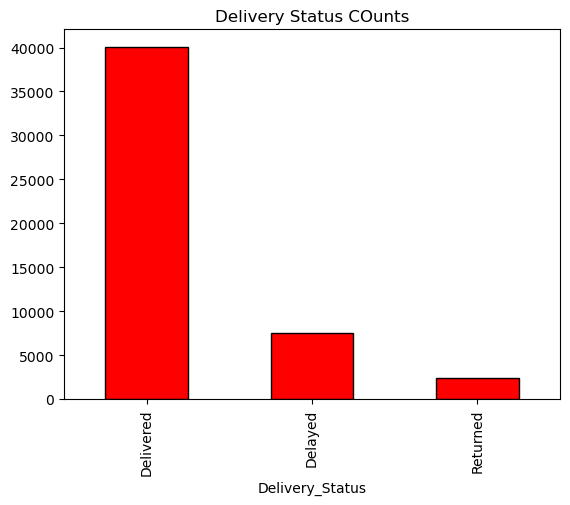

In [23]:
df["Delivery_Status"].value_counts().plot(kind="bar",color="red",edgecolor="black")
plt.title("Delivery Status COunts")
plt.show()

### 3️⃣ Shipping Mode Distribution ###

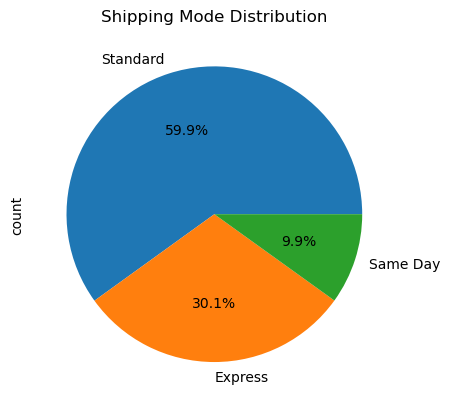

In [24]:
df["Shipping_Mode"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("Shipping Mode Distribution")
plt.show()

## Bivariate Analysis ##

### Delivery Days vs Shipping Mode ###

In [26]:
df.groupby("Shipping_Mode")["Delivery_Days"].mean()

Shipping_Mode
Express     6.008961
Same Day    5.962515
Standard    5.984619
Name: Delivery_Days, dtype: float64

### Shipping Cost by Region ###

In [27]:
df.groupby("Customer_Region")["Shipping_Cost"].mean()

Customer_Region
Central    138.103687
East       138.343076
North      139.726421
South      139.242629
West       138.777943
Name: Shipping_Cost, dtype: float64

### Delayed Orders % by Region ###

In [29]:
(df[df['Delivery_Status']=="Delayed"]
     .groupby('Customer_Region')['Order_ID']
     .count()
) / df.groupby('Customer_Region')['Order_ID'].count() * 100


Customer_Region
Central    15.330632
East       14.552887
North      14.762193
South      14.970714
West       15.414315
Name: Order_ID, dtype: float64